In [1]:
# Illustration for report

In [113]:
import datamol as dm
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torchmetrics.functional import pairwise_cosine_similarity

from src.modules.compound_transforms.pna import PNATransform

In [14]:
trans = PNATransform("smiles")

In [119]:
smile = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
mol = dm.to_mol(smile)
inchi = dm.to_inchi(mol)
selfies = dm.to_selfies(mol)
smarts = dm.to_smarts(mol)
graph = trans(mol)
adj = graph.adjacency_matrix().to_dense().numpy().astype(int)
nfeats = graph.ndata["feat"].numpy().astype(int)
efeats = graph.edata["feat"].numpy().astype(int)

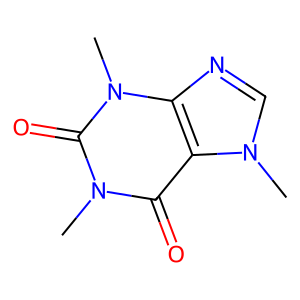

In [120]:
dm.viz.to_image(mol, use_svg=False, outfile="./images/simple_mol1.png")

In [123]:
smiless = [
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
    "CN=C=O",
    "COc(c1)cccc1C#N",
    "[Cu+2].[O-]S(=O)(=O)[O-]",
    "O=Cc1ccc(O)c(OC)c1 COc1cc(C=O)ccc1O",
]

In [124]:
for smiles in smiless:
    mol = dm.to_mol(smiles)
    dm.viz.to_image(mol, use_svg=False, outfile=f"./images/{smiles}.png")

In [67]:
smile = "COc(c1)cccc1C#N"
mol = dm.to_mol(smile)
inchi = dm.to_inchi(mol)
selfies = dm.to_selfies(mol)
smarts = dm.to_smarts(mol)
graph = trans(mol)
adj = graph.adjacency_matrix().to_dense().numpy().astype(int)
nfeats = graph.ndata["feat"].numpy().astype(int)
efeats = graph.edata["feat"].numpy().astype(int)

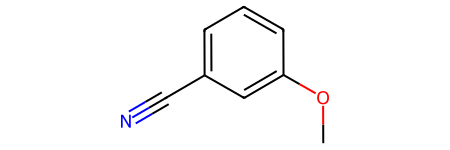

In [90]:
mol

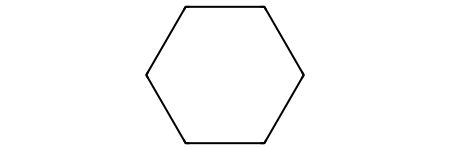

In [97]:
dm.to_mol("C1CCCCC1")

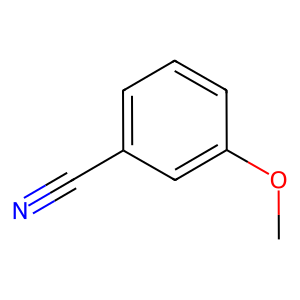

In [110]:
dm.viz.to_image(mol, use_svg=False, outfile="./images/simple_mol.pdf")

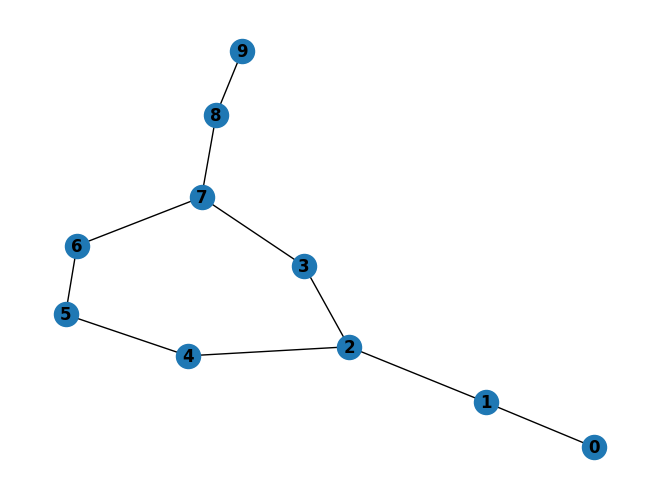

In [83]:
G = dm.to_graph(mol)
nx.draw(G, with_labels=True, font_weight="bold")

In [118]:
pd.DataFrame(adj).to_csv("./images/adj.csv", index=False, header=False)

In [71]:
array_to_bmatrix(adj, "%.0f"), array_to_bmatrix(nfeats, "%.0f"), array_to_bmatrix(efeats, "%.0f")

\begin{bmatrix} 
 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\
 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\
 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & \\
 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & \\
 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & \\
 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & \\
 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & \\
 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & \\
 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & \\
\end{bmatrix}
\begin{bmatrix} 
 5 & 0 & 4 & 5 & 3 & 0 & 2 & 0 & 0 & \\
 7 & 0 & 2 & 5 & 0 & 0 & 1 & 0 & 0 & \\
 5 & 0 & 3 & 5 & 0 & 0 & 1 & 1 & 1 & \\
 5 & 0 & 3 & 5 & 1 & 0 & 1 & 1 & 1 & \\
 5 & 0 & 3 & 5 & 1 & 0 & 1 & 1 & 1 & \\
 5 & 0 & 3 & 5 & 1 & 0 & 1 & 1 & 1 & \\
 5 & 0 & 3 & 5 & 0 & 0 & 1 & 1 & 1 & \\
 5 & 0 & 2 & 5 & 0 & 0 & 0 & 0 & 0 & \\
 6 & 0 & 1 & 5 & 0 & 0 & 0 & 0 & 0 & \\
 5 & 0 & 3 & 5 & 1 & 0 & 1 & 1 & 1 & \\
\end{bmatrix}
\begin{bmatrix} 
 0 & 0 & 0 & \\
 0 & 0 & 0 & \\
 0 & 0 & 1 & \\
 0 & 0 & 1 & \\
 3 & 0 & 1 & \\
 

(None, None, None)

In [73]:
selfies, smile, inchi, smarts

('[C][O][C][=C][C][=C][C][Branch1][Ring1][C][#N][=C][Ring1][Branch2]',
 'COc(c1)cccc1C#N',
 'InChI=1S/C8H7NO/c1-10-8-4-2-3-7(5-8)6-9/h2-5H,1H3',
 '[#6]-[#8]-[#6]1:[#6]:[#6](:[#6]:[#6]:[#6]:1)-[#6]#[#7]')

In [2]:
pdist = nn.PairwiseDistance(p=2)
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
output = pdist(input1, input2)

In [6]:
pairwise_cosine_similarity(input1, input2)

tensor([[ 0.0443,  0.0486,  0.0588,  ...,  0.0199, -0.0699, -0.2329],
        [-0.1026,  0.2526, -0.1167,  ...,  0.0619, -0.1334,  0.0745],
        [ 0.1473,  0.0062, -0.1182,  ..., -0.0099,  0.0136, -0.0080],
        ...,
        [ 0.0181, -0.0708, -0.0487,  ..., -0.0142,  0.0257,  0.0264],
        [ 0.0104, -0.1124, -0.0534,  ..., -0.1524, -0.0526,  0.0307],
        [ 0.0169, -0.0235, -0.0051,  ..., -0.0487,  0.1530, -0.1144]])

In [11]:
torch.cdist(input1, input2)

tensor([[14.7545, 14.4521, 14.6172,  ..., 15.8993, 15.4566, 16.5075],
        [16.7507, 13.5800, 16.8317,  ..., 16.3400, 16.8312, 15.1467],
        [14.0234, 14.8654, 16.0314,  ..., 16.2247, 14.9349, 15.0219],
        ...,
        [15.6920, 16.1122, 16.1907,  ..., 16.8768, 15.4908, 15.4137],
        [16.1336, 16.8270, 16.6188,  ..., 18.3781, 16.4935, 15.7627],
        [15.1744, 15.2081, 15.3180,  ..., 16.6453, 13.9495, 15.9214]])